In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns

### Natural Disasters Dataset

In [2]:
dti = pd.read_csv(r"natural.csv")
dti.head(6)

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2
5,All natural disasters,NaN,1905,4


In [3]:
dti.shape

(828, 4)

### I dropped the code column because I won't be using that

In [4]:
dti = dti.drop(columns=['Code'])
dti

,Entity,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,1900,5
1,All natural disasters,1901,2
2,All natural disasters,1902,9
3,All natural disasters,1903,8
4,All natural disasters,1904,2
...,...,...,...
823,Wildfire,2014,4
824,Wildfire,2015,12
825,Wildfire,2016,10
826,Wildfire,2017,13


In [5]:
dti['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

###  I changed the dataframe like rows to be year, the columns to be the types of natural disasters and the values in the table to be the number of natural disasters

In [6]:
dti2 = dti.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters (reported disasters)')
dti2.head()

Entity,All natural disasters,Drought,Earthquake,Extreme temperature,Extreme weather,Flood,Impact,Landslide,Mass movement (dry),Volcanic activity,Wildfire
Year,,,,,,,,,,,
1900,5.0,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
1901,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,9.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0,NaN
1903,8.0,1.0,1.0,NaN,2.0,2.0,NaN,NaN,1.0,1.0,NaN
1904,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


### I changed the values from nan to 0 and added Occurrence to the Column names

In [7]:
dti2.fillna(value = 0, inplace = True)
dti2 = dti2.add_suffix(' (Occurrence)')
dti2.head()

Entity,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),Wildfire (Occurrence)
Year,,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### I made a graph showing the natural disasters that occurred between 1950-2018, each natural disaster being a different color and the number of natural disasters by year according to their rate of occurrence.

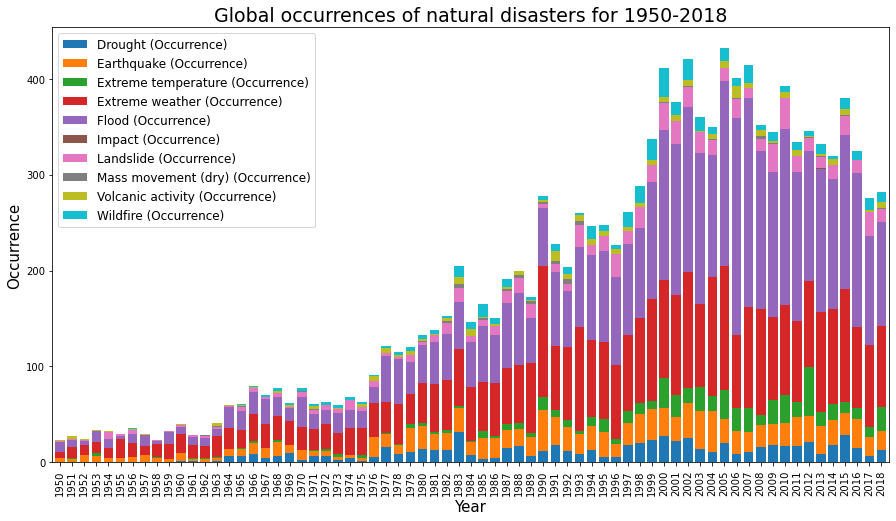

In [8]:
dti2.drop(['All natural disasters (Occurrence)'], axis = 1).loc[1950:].plot.bar(width = 0.8, stacked = True, figsize = (15, 8))

plt.title('Global occurrences of natural disasters for 1950-2018', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Occurrence', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})

plt.show()

In [17]:
dti2

Entity,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),Wildfire (Occurrence)
Year,,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2014,320.0,18.0,26.0,17.0,99.0,135.0,0.0,15.0,0.0,6.0,4.0
2015,380.0,28.0,23.0,12.0,118.0,160.0,0.0,20.0,1.0,6.0,12.0
2016,325.0,15.0,30.0,12.0,84.0,161.0,0.0,13.0,0.0,0.0,10.0


### Dataset showing temperature values on certain dates between 1850-2015

In [9]:
dtc = pd.read_csv(r"climate2.csv")
dtc.head(6)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
5,1750-06-01,12.937,1.724,NaN,NaN,NaN,NaN,NaN,NaN


### I created new dataframe from dataframe with only dt and LandAndOceanAverageTemperature values. I shortened LandAndOceanAverageTemperature to AvaragreTemp

In [10]:
dtc = dtc[['dt', 'LandAndOceanAverageTemperature']]
dtc['dt'] = pd.to_datetime(dtc['dt'])
dtc.set_index('dt', inplace = True)
dtc.sort_index(axis = 0, inplace = True)

dtc = dtc.resample('A').mean()
dtc.rename(columns = {'LandAndOceanAverageTemperature': 'AverageTemp'}, inplace = True)
dtc.index.rename('Year', inplace = True)
dtc.index = dtc.index.year

In [11]:
dtc

,AverageTemp
Year,
1750,NaN
1751,NaN
1752,NaN
1753,NaN
1754,NaN
...,...
2011,15.769500
2012,15.802333
2013,15.854417


### Graph showing temperature changes over the years

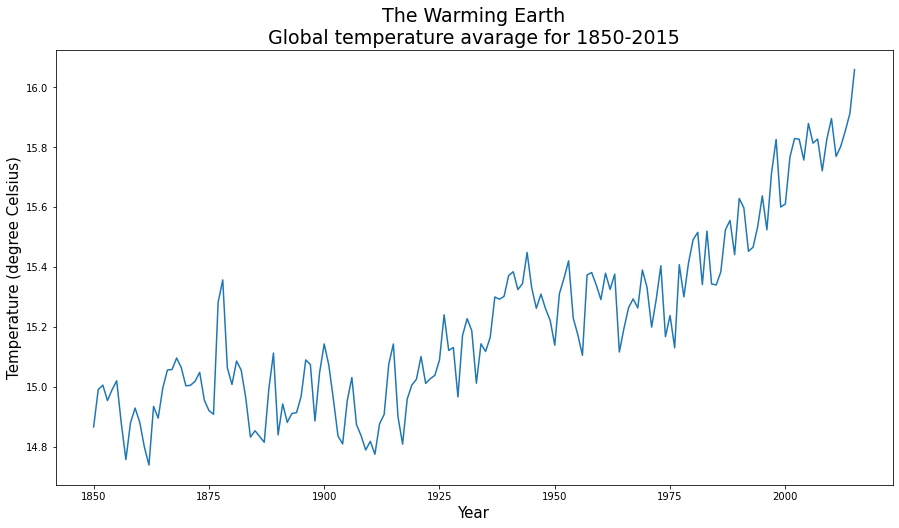

In [12]:
plt.figure(figsize = (15, 8))

plt.plot(dtc['AverageTemp'])

plt.title('The Warming Earth\nGlobal temperature avarage for 1850-2015', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature (degree Celsius)', fontsize = 15)

plt.show()

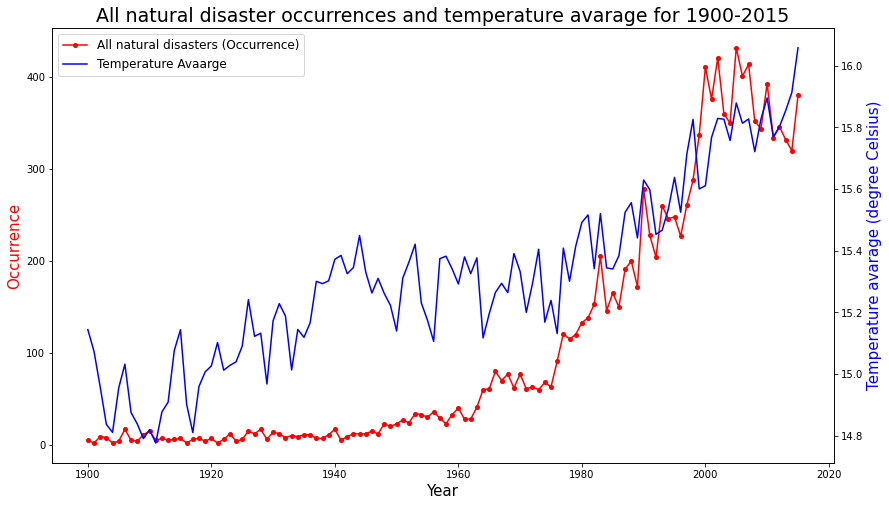

In [13]:
# Plot all natural disasters occurrences and temperature anomaly for comparison
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(dti2.loc[:2015, 'All natural disasters (Occurrence)'], '-ro', markersize = 4, label = 'All natural disasters (Occurrence)')
line2 = ax2.plot(dtc.loc[1900:, 'AverageTemp'], 'b-', label = 'Temperature Avaarge')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('All natural disaster occurrences and temperature avarage for 1900-2015', fontsize = 19)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15, color = 'r')
ax2.set_ylabel('Temperature avarage (degree Celsius)', fontsize = 15, color = 'b')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})

plt.show()

### Graph that aggregates the number of natural disasters and average temperature values and shows their changes over the years. Thanks to this graph, we see that the number of natural disasters increases as the temperature increases due to climate change.

### I summed up the numbers of all natural disasters that occurred in a year and wrote them in a column called alldis

In [36]:
dti2['alldis'] = dti2.sum(axis=1)
dti2

Entity,All natural disasters (Occurrence),Drought (Occurrence),Earthquake (Occurrence),Extreme temperature (Occurrence),Extreme weather (Occurrence),Flood (Occurrence),Impact (Occurrence),Landslide (Occurrence),Mass movement (dry) (Occurrence),Volcanic activity (Occurrence),Wildfire (Occurrence),alldis
Year,,,,,,,,,,,,
1900,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,30.0
1901,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
1902,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,54.0
1903,8.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,48.0
1904,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014,320.0,18.0,26.0,17.0,99.0,135.0,0.0,15.0,0.0,6.0,4.0,1920.0
2015,380.0,28.0,23.0,12.0,118.0,160.0,0.0,20.0,1.0,6.0,12.0,2280.0
2016,325.0,15.0,30.0,12.0,84.0,161.0,0.0,13.0,0.0,0.0,10.0,1950.0


### I made a new dataframe containing only natural disaster numbers and years

In [38]:
dti3 = pd.DataFrame(dti2['alldis'], columns=['alldis'])
dti3

,alldis
Year,
1900,30.0
1901,12.0
1902,54.0
1903,48.0
1904,12.0
...,...
2014,1920.0
2015,2280.0
2016,1950.0


### I merged the dti3 and dtc dataframes according to the year column

In [39]:
df_combined = pd.merge(left = dti3, right = dtc, on = "Year")

In [40]:
df_combined

,alldis,AverageTemp
Year,,
1900,30.0,15.143917
1901,12.0,15.073333
1902,54.0,14.958333
1903,48.0,14.836583
1904,12.0,14.810417
...,...,...
2011,2004.0,15.769500
2012,2076.0,15.802333
2013,1992.0,15.854417


### This is the graph about Effect of temperature on disaster frequency

The pearson r correlation coefficient is 0.8651282818391877 and the p value is 5.8896879168026826e-36.


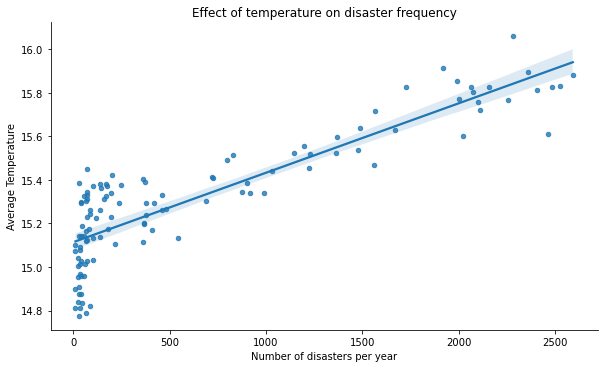

In [48]:
ax = sns.lmplot(x="alldis", y="AverageTemp", data=df_combined, fit_reg = True, aspect=1.7, height=5,markers=['o'], scatter_kws={'s':20})
ax.set(title='Effect of temperature on disaster frequency', ylabel='Average Temperature', xlabel="Number of disasters per year")

r, p = scipy.stats.pearsonr(df_combined['alldis'], df_combined['AverageTemp'])
print (f'The pearson r correlation coefficient is {r} and the p value is {p}.')